In [27]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [28]:
Q = np.zeros((STATES,ACTIONS)) # initialize an empty Q table (zeros)
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [33]:
EPISODES = 2000
MAX_STEPS = 100 #limit nr of steps to avoid infinite loops
LEARNING_RATE = 0.81
GAMMA = 0.96
RENDER = False

In [34]:
# Pick random action or pick action Q Tabler
epsilon = 0.9 # start with 90% chance of pick a random action

rewards=[]
for episode in range(EPISODES):

    state = env.reset()

    for _ in range(MAX_STEPS):

        if RENDER:
            env.render()

        # code to choose action
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample() # random action
        else:
            action = np.argmax(Q[state,:]) # select best action from Q table

        next_state, reward, done, _ = env.step(action)

        Q[state,action] = Q[state,action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state,:]) - Q[state,action])

        state = next_state

        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")


[[1.01644266e-02 1.82459150e-01 7.47475335e-03 1.02424122e-02]
 [1.23511310e-03 4.70509626e-03 2.13763840e-03 3.95555862e-02]
 [9.68350201e-04 1.93081186e-03 2.90507042e-03 1.47733361e-02]
 [8.53682058e-04 1.12997985e-03 8.67856921e-04 5.25784982e-03]
 [1.50659792e-01 8.15789386e-03 5.55693620e-03 8.69232505e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.02820096e-03 3.86070915e-05 2.81925077e-05 2.09357075e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.19797680e-03 3.77451705e-03 1.86391622e-03 1.14482455e-01]
 [1.77010234e-03 4.51861157e-02 4.45994398e-03 1.73874920e-03]
 [1.06813067e-02 2.93913591e-04 9.34969158e-04 8.86716973e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.66216479e-02 9.67955280e-02 2.30505335e-01 2.20840710e-02]
 [1.76067175e-01 3.56019432e-01 1.68214550e-01 1.86915078e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

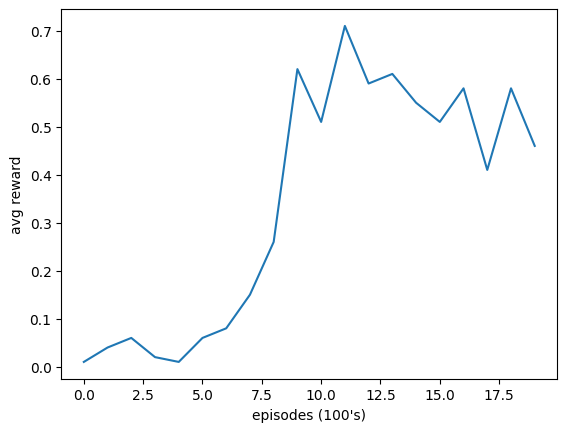

In [35]:
# plot training in a graph

import matplotlib.pyplot as plt
#print(rewards)
def get_average(values):
    return sum(values)/len(values)

avg_rewards=[]
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('avg reward')
plt.xlabel('episodes (100\'s)')
plt.show()